In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
# We shall generate random data using make_blobs()
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples = 50, centers = [[4,4], [-2, -1], [1, 1], [10,4]], cluster_std= 0.9, random_state= 42)

print("The actual artificial data we have generated: \n",X1[:5])
print()
print("The labelled data points of the artifical data generated:",y1[:5])

The actual artificial data we have generated: 
 [[-1.25970958 -2.09875928]
 [ 3.51005555  4.09983033]
 [-3.19536744 -0.82282489]
 [ 3.18277833  2.72892667]
 [ 4.21776604  2.27804778]]

The labelled data points of the artifical data generated: [1 0 1 0 0]


* X1 has the artificial data we had created
* y1 has the labelled set of the data we had created

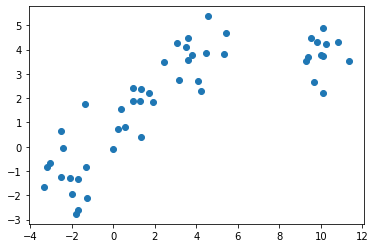

In [26]:
plt.scatter(X1[:,0], X1[:,1], marker ='o')

**AGGLOMERATIVE CLUSTERING**

* the AGGLOMERATIVE CLUSTERING class will require two inputs: n_clusters(the number of centroids to generate), linkage (which linkage criterion to be used)

In [31]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=4, linkage= 'average')
# Intialising the model

In [32]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

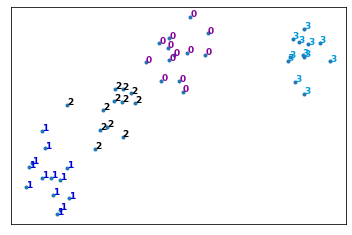

In [33]:
plt.figure(figsize=(6,4))

# Now we scale the datapoints down or else the data points would be scattered a lot

# We create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

Text(0.5, 1.0, 'Algorithm segregated Cluster')

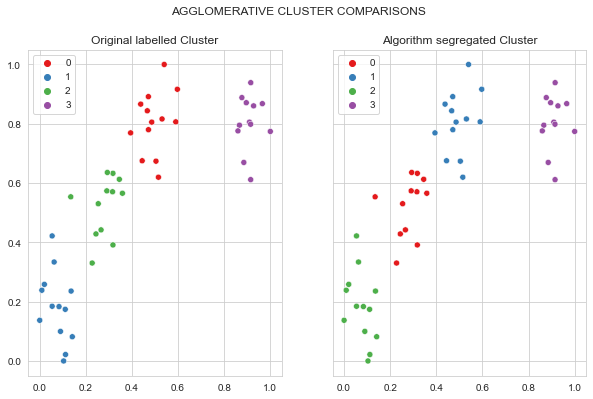

In [113]:
fig,ax1 = plt.subplots(1,2, sharey= True, figsize= (10,6))
sns.set_style('whitegrid')
fig.suptitle("AGGLOMERATIVE CLUSTER COMPARISONS")

sns.scatterplot(ax = ax1[0], y=X1[:,1], x=X1[:,0],  hue= y1, marker='o', palette= 'Set1')
ax1[0].set_title("Original labelled Cluster")

sns.scatterplot(ax =ax1[1],y= X1[:,1], x=X1[:,0],  hue= agglom.labels_, marker ='o', palette= 'Set1')
ax1[1].set_title("Algorithm segregated Cluster")

In [86]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.82856517 0.205026   ... 0.56884201 0.5745112  0.83870507]
 [0.82856517 0.         0.75855849 ... 0.26094244 0.27077397 0.03651096]
 [0.205026   0.75855849 0.         ... 0.5028991  0.48826624 0.76004345]
 ...
 [0.56884201 0.26094244 0.5028991  ... 0.         0.05695506 0.2698886 ]
 [0.5745112  0.27077397 0.48826624 ... 0.05695506 0.         0.27209324]
 [0.83870507 0.03651096 0.76004345 ... 0.2698886  0.27209324 0.        ]]


ipykernel_launcher:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


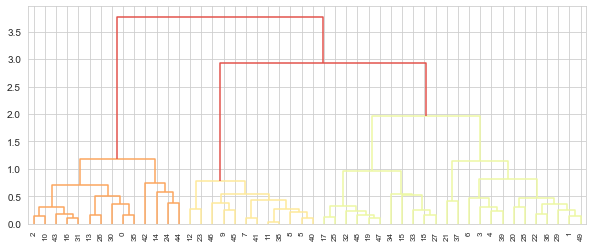

In [97]:
from scipy import ndimage
from scipy.cluster.hierarchy import dendrogram
Z= hierarchy.linkage(dist_matrix, 'average')
plt.figure(figsize=(10,4))
plt.set_cmap('seismic')
dendro = hierarchy.dendrogram(Z)